In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
orders_file = pd.read_parquet('Data/orders.parquet')
orders_file.head()


,order_id,PNR,order_created_at,booking_system,Site_Country,Brand,Order_Amount,currency,Revenue,Partner,...,Device,client_entry_type,booking_system_source_type,Origin_Country,Destination_Country,Journey_Type_ID,Is_Changed,Is_Canceled,cancel_reason,change_reason
0,4607745402,VVNVMF,2024-01-01 00:00:01,System A,Italy,Brand A,824.68,Euro,9.09,Partner A,...,PC,b2bapi,GDS,Italy,Saudi Arabia,One-way,0,0,Undefined,Initial - Not Changed
1,4607744269,8WJRXE,2024-01-01 00:00:04,System A,Australia,Brand A,1760.80,Australian Dollar,14.74,Partner B,...,iPhone,metasearch,GDS,Australia,Philippines,Round-trip,1,0,Undefined,Schedule change: Primary Alternative
2,4607745343,EN91QW,2024-01-01 00:00:05,System B,Brazil,Brand B,977.50,Brazilian Real,58.94,Partner C,...,Android Phone,metasearch,API,Brazil,Brazil,Round-trip,0,0,Undefined,Initial - Not Changed
3,4607745473,PPY1VQ,2024-01-01 00:00:10,System B,USA,Brand A,61.78,US Dollar,10.09,Partner A,...,iPhone,b2bapi,API,USA,USA,Round-trip,0,0,Undefined,Initial - Not Changed
4,4607745421,75NN7W,2024-01-01 00:00:14,System C,Germany,Brand A,1756.50,Euro,9.09,Partner A,...,iPhone,b2bapi,NDC,Germany,USA,OpenJawSingleOrigin,0,0,Undefined,Initial - Not Changed


In [3]:
orders_file.columns

Index(['order_id', 'PNR', 'order_created_at', 'booking_system', 'Site_Country',
       'Brand', 'Order_Amount', 'currency', 'Revenue', 'Partner',
       'Customer_Group_Type', 'Device', 'client_entry_type',
       'booking_system_source_type', 'Origin_Country', 'Destination_Country',
       'Journey_Type_ID', 'Is_Changed', 'Is_Canceled', 'cancel_reason',
       'change_reason'],
      dtype='object')

In [4]:
# X = orders_file['currency'].unique().tolist()
# print(X)
# ['Euro', 'Australian Dollar', 'Brazilian Real', 'US Dollar', 'Danish Krone', 'Saudi Riyal', 'Mexican Peso', 'Pound Sterling', 'Zloty', 
#  'Norwegian Krone', 'Canadian Dollar', 'United Arab Emirates dirham', 'Swedish Krona', 'Chilean Peso', 'Peso Uruguayo', 'Nuevo Sol Peru', 
#  'South Korean Won', 'Malaysian Ringgit', 'Argentine Peso', 'Thai Baht', 'Czech Koruna', 'Colombian Peso Colombia', 'Kuwaiti Dinar', 'Swiss Franc', 
#  'Hryvnia Ukraine', 'South African Rand', 'Japanese yen', 'Jordanian Dinar', 'Bahraini Dinar', 'New Zealand Dollar', 'Indian Rupee', 'Egyptian Pound', 
#  'Bulgarian Lev', 'Rupiah Indonesia', 'Turkish Lira', 'Qatari Rial', 'Singapore Dollar', 'Hong Kong Dollar', 'Philippine Peso', 'New Taiwan Dollar', 
#  'Rial Omani Oman', 'Forint', 'Yuan Renminbi', 
#  'Vietnamese dong', 'Iceland Krona', 'Tenge Kazakhstan', 'Uzbekistan Som']



currency_name_to_code = {
    'Euro': 'EUR',
    'Australian Dollar': 'AUD',
    'Brazilian Real': 'BRL',
    'US Dollar': 'USD',
    'Danish Krone': 'DKK',
    'Saudi Riyal': 'SAR',
    'Mexican Peso': 'MXN',
    'Pound Sterling': 'GBP',
    'Zloty': 'PLN',
    'Norwegian Krone': 'NOK',
    'Canadian Dollar': 'CAD',
    'United Arab Emirates dirham': 'AED',
    'Swedish Krona': 'SEK',
    'Chilean Peso': 'CLP',
    'Peso Uruguayo': 'UYU',
    'Nuevo Sol Peru': 'PEN',
    'South Korean Won': 'KRW',
    'Malaysian Ringgit': 'MYR',
    'Argentine Peso': 'ARS',
    'Thai Baht': 'THB',
    'Czech Koruna': 'CZK',
    'Colombian Peso Colombia': 'COP',
    'Kuwaiti Dinar': 'KWD',
    'Swiss Franc': 'CHF',
    'Hryvnia Ukraine': 'UAH',
    'South African Rand': 'ZAR',
    'Japanese yen': 'JPY',
    'Jordanian Dinar': 'JOD',
    'Bahraini Dinar': 'BHD',
    'New Zealand Dollar': 'NZD',
    'Indian Rupee': 'INR',
    'Egyptian Pound': 'EGP',
    'Bulgarian Lev': 'BGN',
    'Rupiah Indonesia': 'IDR',
    'Turkish Lira': 'TRY',
    'Qatari Rial': 'QAR',
    'Singapore Dollar': 'SGD',
    'Hong Kong Dollar': 'HKD',
    'Philippine Peso': 'PHP',
    'New Taiwan Dollar': 'TWD',
    'Rial Omani Oman': 'OMR',
    'Forint': 'HUF',
    'Yuan Renminbi': 'CNY',
    'Vietnamese dong': 'VND',
    'Iceland Krona': 'ISK',
    'Tenge Kazakhstan': 'KZT',
    'Uzbekistan Som': 'UZS'
}
#Static exchange rate, in actual analysis it has to be updated so it uses API, easy-exchange-rates and forex-python has been tried so far, 
#Read their documentationss to see why the exchange has problems. 
exchange_rates_to_usd = {
    'USD': 1,
    'EUR': 1.08,
    'AUD': 0.64,
    'BRL': 0.19,
    'DKK': 0.14,
    'SAR': 0.27,
    'MXN': 0.052,
    'GBP': 1.37,
    'PLN': 0.26,
    'NOK': 0.11,
    'CAD': 0.75,
    'AED': 0.27,
    'SEK': 0.095,
    'CLP': 0.0012,
    'UYU': 0.023,
    'PEN': 0.27,
    'KRW': 0.00076,
    'MYR': 0.23,
    'ARS': 0.010,
    'THB': 0.032,
    'CZK': 0.048,
    'COP': 0.00026,
    'KWD': 3.28,
    'CHF': 1.09,
    'UAH': 0.036,
    'ZAR': 0.055,
    'JPY': 0.0074,
    'JOD': 1.41,
    'BHD': 2.65,
    'NZD': 0.63,
    'INR': 0.013,
    'EGP': 0.032,
    'BGN': 0.58,
    'IDR': 0.000066,
    'TRY': 0.054,
    'QAR': 0.27,
    'SGD': 0.74,
    'HKD': 0.13,
    'PHP': 0.018,
    'TWD': 0.032,
    'OMR': 2.60,
    'HUF': 0.0031,
    'CNY': 0.15,
    'VND': 0.000043,
    'ISK': 0.0075,
    'KZT': 0.0023,
    'UZS': 0.000091
}



def convert_prices_to_usd(df):
    
    df['currency_code'] = df['currency'].map(currency_name_to_code)

    currency_index = df.columns.get_loc('currency')  
    df.insert(currency_index + 1, 'currency_code', df.pop('currency_code'))

    # Check for unmapped currencies
    unmapped = df[df['currency_code'].isna()]['currency'].unique()
    if len(unmapped) > 0:
        print("Unmapped currencies:", unmapped)

    
    df['Order_Amount_in_usd'] = df.apply(
        lambda row: row['Order_Amount'] * exchange_rates_to_usd.get(row['currency_code'], 0) if row['currency_code'] in exchange_rates_to_usd else 0,
        axis=1
    )
    
    price_index = df.columns.get_loc('Order_Amount')
    df.insert(price_index + 1, 'Order_Amount_in_usd', df.pop('Order_Amount_in_usd'))

    df['Revenue_in_usd'] = df.apply(
        lambda row: row['Revenue'] * exchange_rates_to_usd.get(row['currency_code'], 0) if row['currency_code'] in exchange_rates_to_usd else 0,
        axis=1
    )
    
    price_index = df.columns.get_loc('Revenue')
    df.insert(price_index + 1, 'Revenue_in_usd', df.pop('Revenue_in_usd'))

    return df


orders_file = convert_prices_to_usd(orders_file)

In [5]:
orders_file['Is_Canceled'].value_counts()

Is_Canceled
0    6053694
1     246512
Name: count, dtype: int64

In [6]:
counts = orders_file['Is_Canceled'].value_counts()
canceled_percentage = counts.get(1,0) / counts.get(0,1) * 100

print(f"{canceled_percentage:.2f}% of orders are canceled")

4.07% of orders are canceled


In [7]:
orders_file.loc[orders_file['Is_Canceled'] == 1, 'cancel_reason'].nunique()

34

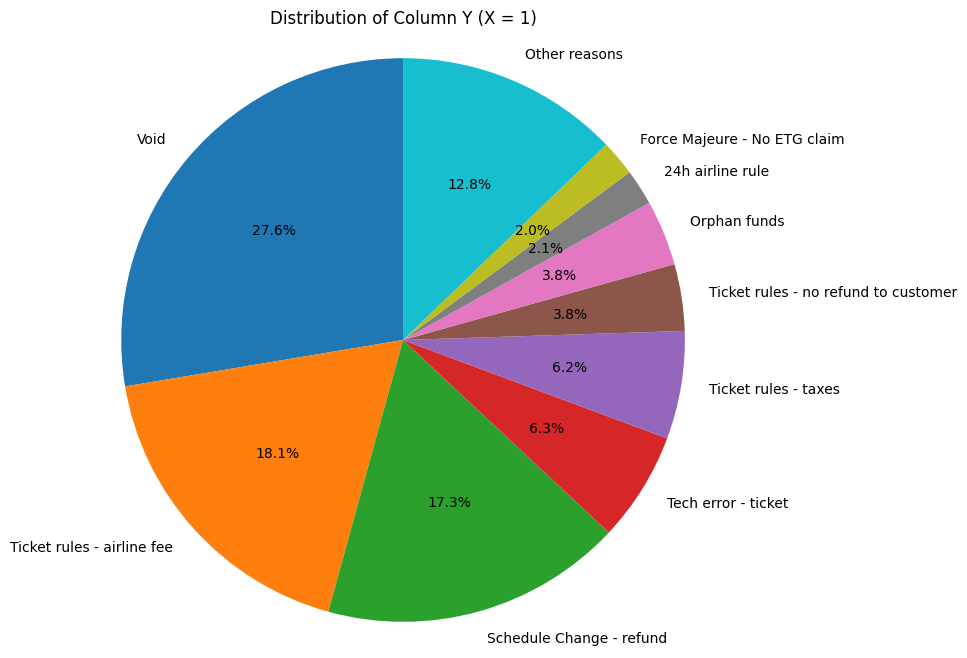

In [8]:
canceled_value_counts = orders_file.loc[orders_file['Is_Canceled'] == 1, 'cancel_reason'].value_counts()

threshold = canceled_value_counts.sum() * 0.02

canceled_counts = canceled_value_counts[canceled_value_counts > threshold]

other_count = orders_file[(orders_file['Is_Canceled'] == 1) & ~orders_file['cancel_reason'].isin(canceled_counts.index)]['cancel_reason'].count()
canceled_counts['Other reasons'] = other_count
canceled_counts['Other reasons']

plt.figure(figsize=(8, 8))
plt.pie(canceled_counts, labels=canceled_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Column Y (X = 1)")
plt.axis('equal')  
plt.show()



In [9]:
#orders_file['cancel_reason'].value_counts()

### Which country is the on top of the origin country `Origin_Country`?

In [10]:
top_tourists = orders_file['Origin_Country'].value_counts().head(1)

origin_name = top_tourists.index[0]
origin_count = top_tourists.values[0]


print(f"Most travels start from: {origin_name} with {origin_count} number")

Most travels start from: Germany with 526442 number


### Which country is The most attractive destination

In [11]:
most_attractive = orders_file['Destination_Country'].value_counts().head(1)

destination_name = most_attractive.index[0]
destination_count = most_attractive.values[0]


print(f"The most attractive destination is: {destination_name} with {destination_count} visits")

The most attractive destination is: Thailand with 411729 visits


The country with the highest average price is: Argentina with an average price of 6408.482119544687
The country with the highest average revenue is: Argentina with an average revenue of 327.76302621532955


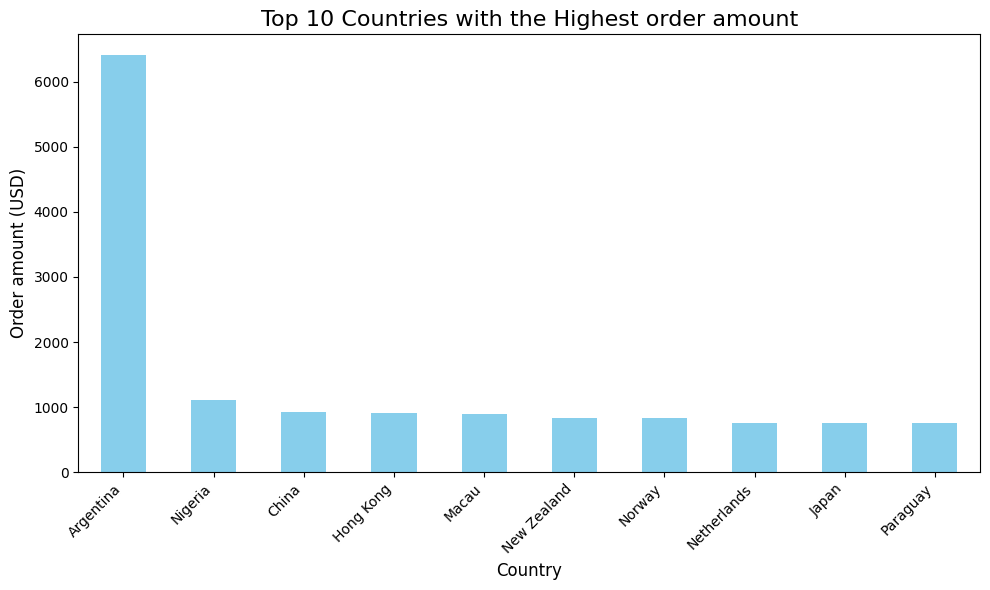

In [12]:
 
average_price_per_country = orders_file.groupby('Site_Country')['Order_Amount_in_usd'].mean()

highest_order_country = average_price_per_country.idxmax()
highest_average_order = average_price_per_country.max()

average_revenue_per_country = orders_file.groupby('Site_Country')['Revenue_in_usd'].mean()

highest_revenue_country = average_revenue_per_country.idxmax()
highest_average_revenue = average_revenue_per_country.max()

print(f"The country with the highest average price is: {highest_order_country} with an average price of {highest_average_order}")
print(f"The country with the highest average revenue is: {highest_revenue_country} with an average revenue of {highest_average_revenue}")


top_10_order_countries = average_price_per_country.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_order_countries.plot(kind='bar', color='skyblue')

plt.title('Top 10 Countries with the Highest order amount', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Order amount (USD)', fontsize=12)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


In [13]:
orders_file['Brand'].value_counts()

Brand
Brand A    3708873
Brand B    1133975
Brand D     840568
Brand C     214832
Brand E     190932
Brand F      97452
Brand G      60627
Brand H      50439
Brand J       1281
Brand K        964
Brand I        255
Brand M          5
Brand L          3
Name: count, dtype: int64

In [14]:

orders_file['Customer_Group_Type'].value_counts()

Customer_Group_Type
SINGLE    3645294
COUPLE    1655721
FAMILY     637471
GROUP      361720
Name: count, dtype: int64

In [15]:
orders_file['client_entry_type'].value_counts()

client_entry_type
metasearch        4048493
b2bapi            1977370
sponsoredlinks     106889
app                 67788
undefined           47599
organic             25224
affiliate           15975
email               10400
newsletter            404
internal               50
competition            12
coupon                  2
Name: count, dtype: int64

In [16]:

orders_file['Device'].value_counts()

Device
PC                2853489
iPhone            2165298
Android Phone     1110813
iPad                67115
Android Tablet      53784
Unknown             46641
AnonPhone            2991
BlackBerry             49
AnonTablet             12
iPod                   12
Application             2
Name: count, dtype: int64

In [17]:

orders_file['Journey_Type_ID'].value_counts()

Journey_Type_ID
One-way                     3829653
Round-trip                  2347358
OpenJawSingleOrigin           66131
MultiStop                     29376
OpenJawSingleDestination      24990
OpenJawDouble                  2698
Name: count, dtype: int64

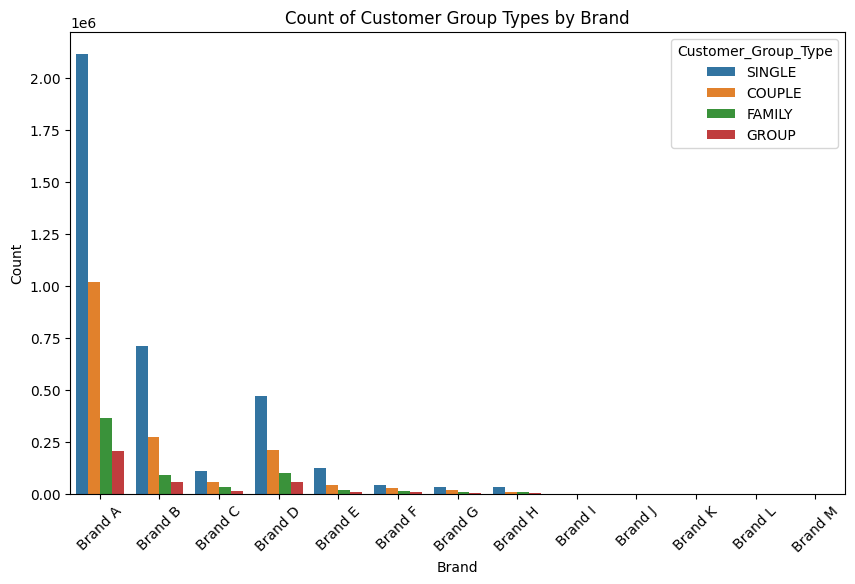

In [18]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', hue='Customer_Group_Type', data=orders_file)
plt.title('Count of Customer Group Types by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


        Order_Value_Category  Order_Amount_in_usd
0                     Medium             890.6544
1                       High            1126.9120
2                        Low             185.7250
3                   Very Low              61.7800
4                       High            1897.0200
...                      ...                  ...
6300201               Medium             527.6500
6300202                 High            1392.1848
6300203                  Low             423.6800
6300204                 High            1198.9281
6300205                  Low             492.9768

[6300206 rows x 2 columns]
  Order_Value_Category  Cancellation_Probability
0             Very Low                  0.028215
1                  Low                  0.035144
2               Medium                  0.043950
3                 High                  0.051434
4            Very High                  0.061170


/var/folders/_6/f4xb86d93znb83vn6wy29k2r0000gn/T/ipykernel_27814/3700804907.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_prob = orders_file.groupby('Order_Value_Category').agg(


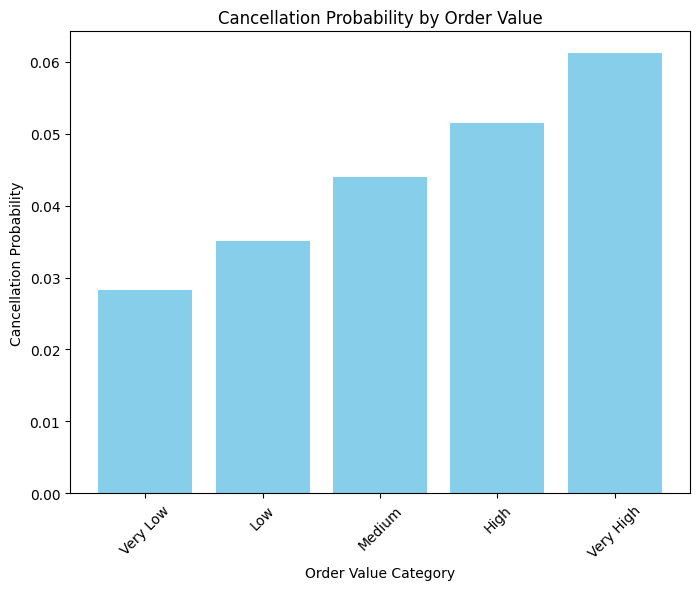

In [19]:
bins = [0, 100, 500, 1000, 5000, float('inf')]  
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

orders_file['Order_Value_Category'] = pd.cut(
    orders_file['Order_Amount_in_usd'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

cancellation_prob = orders_file.groupby('Order_Value_Category').agg(
    Cancellation_Probability=('Is_Canceled', 'mean')
).reset_index()

print(orders_file[['Order_Value_Category', 'Order_Amount_in_usd']])
print(cancellation_prob)


plt.figure(figsize=(8, 6))
plt.bar(cancellation_prob['Order_Value_Category'], cancellation_prob['Cancellation_Probability'], color='skyblue')
plt.xlabel('Order Value Category')
plt.ylabel('Cancellation Probability')
plt.title('Cancellation Probability by Order Value')
plt.xticks(rotation=45)
plt.show()


       Origin_Country Destination_Country Site_Country   Count
130385            USA                 USA          USA  172090
11923          Brazil              Brazil       Brazil  170467
60073           Italy               Italy        Italy   69239
113630          Spain               Spain        Spain   53770
43695         Germany              Turkey      Germany   49606
43344         Germany               Spain      Germany   48600
16328          Canada              Canada       Canada   45892
123170       Thailand            Thailand     Thailand   41244
2853        Australia           Australia    Australia   36098
123129       Thailand            Thailand      Germany   34452


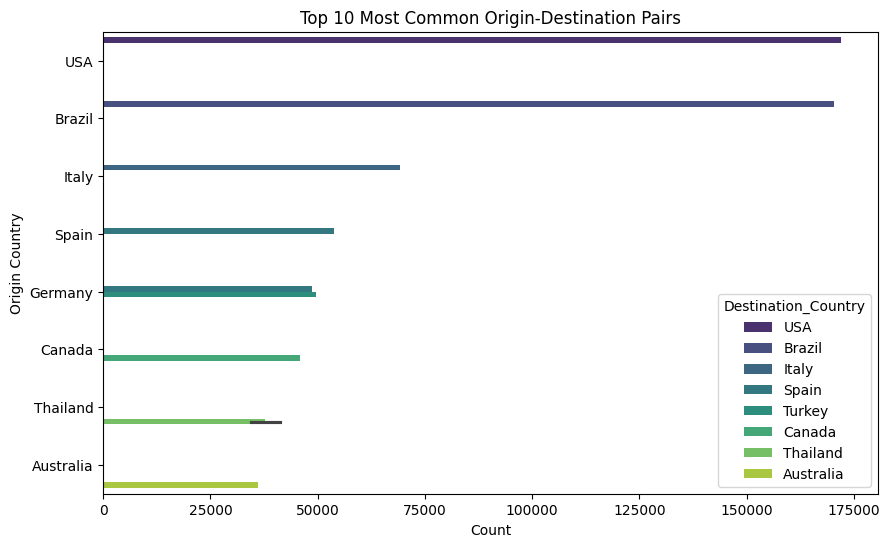

In [20]:
origin_dest_counts = orders_file.groupby(['Origin_Country', 'Destination_Country','Site_Country']).size().reset_index(name='Count')

sorted_origin_dest = origin_dest_counts.sort_values(by='Count', ascending=False)

top_10_origin_dest = sorted_origin_dest.head(10)

print(top_10_origin_dest)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_origin_dest, x='Count', y='Origin_Country', hue='Destination_Country', palette='viridis')
plt.title('Top 10 Most Common Origin-Destination Pairs')
plt.xlabel('Count')
plt.ylabel('Origin Country')
plt.show()

In [21]:
orders_file['Journey_Type_ID'].unique()

array(['One-way', 'Round-trip', 'OpenJawSingleOrigin', 'MultiStop',
       'OpenJawSingleDestination', 'OpenJawDouble'], dtype=object)

In [22]:
uniq_per_id = orders_file.groupby('order_id')['PNR'].nunique()

ids_with_more_name = uniq_per_id[uniq_per_id>1]

if ids_with_more_name.empty:
    print("Each id belongs to only one name.")
else:
    print('The following ids are associated with multiple names:')
    print(ids_with_more_name)

Each id belongs to only one name.


In [23]:
df = orders_file[orders_file['Order_Amount_in_usd'] > 0].copy()
df['ratio_revenue_to_total'] = (df['Revenue_in_usd'] / df['Order_Amount_in_usd']) * 100
average_ratio = df['ratio_revenue_to_total'].mean()

print(f"{average_ratio:.2f}%")

6.47%


In [24]:
destination_analysis = df.groupby('Destination_Country')['ratio_revenue_to_total'].mean().reset_index()
destination_analysis = destination_analysis.sort_values(by='ratio_revenue_to_total', ascending=False)

origin_analysis = df.groupby('Origin_Country')['ratio_revenue_to_total'].mean().reset_index()
origin_analysis = origin_analysis.sort_values(by='ratio_revenue_to_total', ascending=False)

customer_group_analysis = df.groupby('Customer_Group_Type')['ratio_revenue_to_total'].mean().reset_index()
customer_group_analysis = customer_group_analysis.sort_values(by='ratio_revenue_to_total', ascending=False)

print("Top Destination Countries by Revenue-to-Total Ratio:")
print(destination_analysis.head())

print("\nTop Origin Countries by Revenue-to-Total Ratio:")
print(origin_analysis.head())

print("\nTop Customer Group Types by Revenue-to-Total Ratio:")
print(customer_group_analysis.head())

Top Destination Countries by Revenue-to-Total Ratio:
    Destination_Country  ratio_revenue_to_total
1               Albania               18.540890
122            Malaysia               11.830193
99                Italy               10.058393
39                Chile                9.745380
159              Poland                9.236801

Top Origin Countries by Revenue-to-Total Ratio:
    Origin_Country  ratio_revenue_to_total
1          Albania               29.592801
2          Algeria               15.366547
122       Malaysia               14.332890
119      Macedonia               10.337341
125          Malta               10.233785

Top Customer Group Types by Revenue-to-Total Ratio:
  Customer_Group_Type  ratio_revenue_to_total
3              SINGLE                8.061272
0              COUPLE                4.859511
2               GROUP                3.409487
1              FAMILY                3.286934


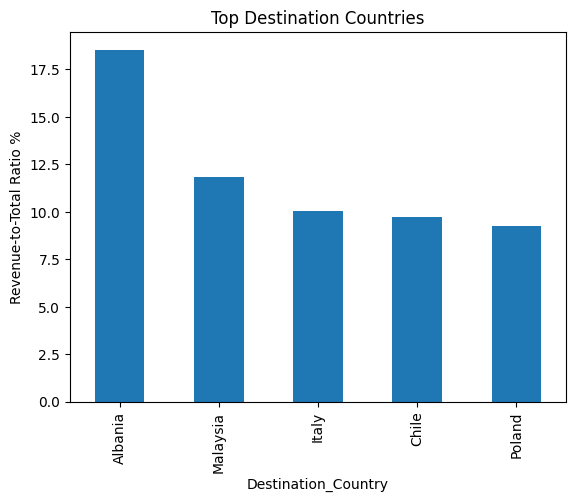

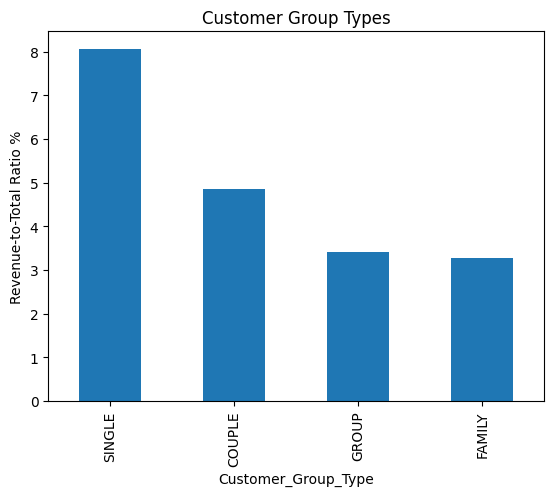

In [25]:
destination_analysis.head(5).plot(
    x='Destination_Country', y='ratio_revenue_to_total', kind='bar', legend=False, title="Top Destination Countries"
)
plt.ylabel('Revenue-to-Total Ratio %')
plt.show()


customer_group_analysis.plot(
    x='Customer_Group_Type', y='ratio_revenue_to_total', kind='bar', legend=False, title="Customer Group Types"
)
plt.ylabel('Revenue-to-Total Ratio %')
plt.show()


In [26]:
canceled_df = orders_file[orders_file['Is_Canceled'] == True].copy()
canceled_df['order_created_at'] = pd.to_datetime(canceled_df['order_created_at'])
canceled_df['MonthYear'] = canceled_df['order_created_at'].dt.to_period('M')

monthly_lost_revenue = canceled_df.groupby('MonthYear')['Revenue_in_usd'].mean().reset_index()
monthly_lost_revenue['MonthYear'] = monthly_lost_revenue['MonthYear'].dt.to_timestamp()


In [27]:
canceled_df.columns

Index(['order_id', 'PNR', 'order_created_at', 'booking_system', 'Site_Country',
       'Brand', 'Order_Amount', 'Order_Amount_in_usd', 'currency',
       'currency_code', 'Revenue', 'Revenue_in_usd', 'Partner',
       'Customer_Group_Type', 'Device', 'client_entry_type',
       'booking_system_source_type', 'Origin_Country', 'Destination_Country',
       'Journey_Type_ID', 'Is_Changed', 'Is_Canceled', 'cancel_reason',
       'change_reason', 'Order_Value_Category', 'MonthYear'],
      dtype='object')

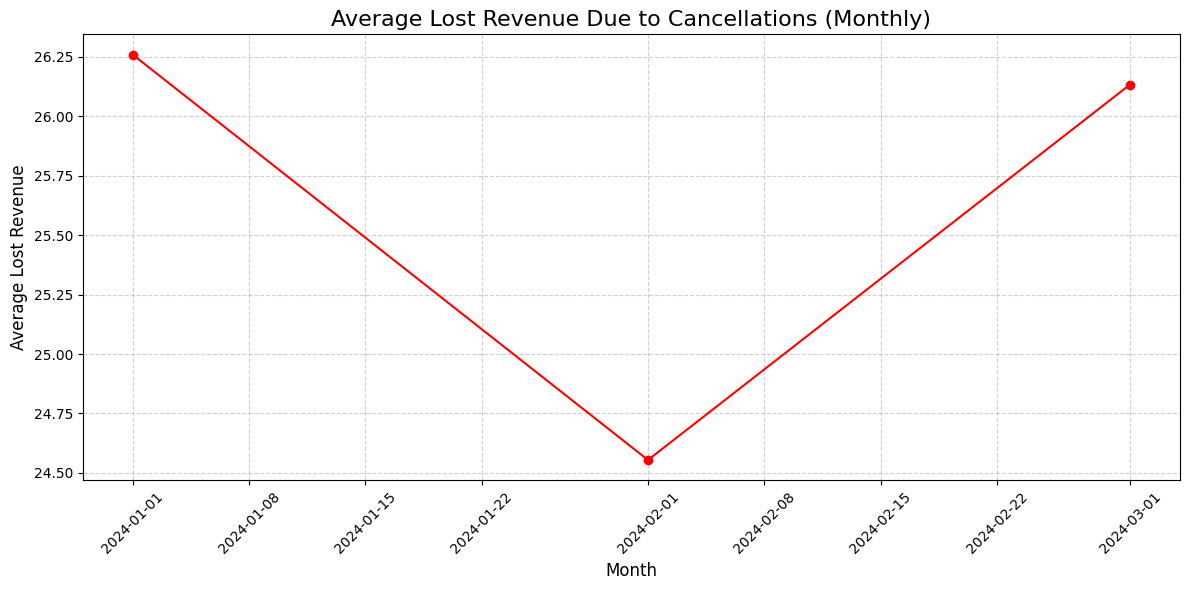

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_lost_revenue['MonthYear'], monthly_lost_revenue['Revenue_in_usd'], marker='o', color='red')
plt.title("Average Lost Revenue Due to Cancellations (Monthly)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Lost Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
orders_file.columns

Index(['order_id', 'PNR', 'order_created_at', 'booking_system', 'Site_Country',
       'Brand', 'Order_Amount', 'Order_Amount_in_usd', 'currency',
       'currency_code', 'Revenue', 'Revenue_in_usd', 'Partner',
       'Customer_Group_Type', 'Device', 'client_entry_type',
       'booking_system_source_type', 'Origin_Country', 'Destination_Country',
       'Journey_Type_ID', 'Is_Changed', 'Is_Canceled', 'cancel_reason',
       'change_reason', 'Order_Value_Category'],
      dtype='object')

In [30]:
orders_file['client_entry_type'].unique()

array(['b2bapi', 'metasearch', 'undefined', 'sponsoredlinks', 'app',
       'affiliate', 'organic', 'email', 'newsletter', 'competition',
       'internal', 'coupon'], dtype=object)

In [31]:
def group_device(device):
    if device in ['iPad', 'iPod', 'iPhone']:
        return 'Apple Devices'
    elif device in ['Android Phone', 'Android Tablet']:
        return 'Android Devices'
    elif device == 'PC':
        return 'PC'
    elif device == 'BlackBerry':
        return 'BlackBerry'
    elif device in ['Unknown', 'AnonTablet', 'AnonPhone', 'Application']:
        return 'Other'
    else:
        return 'Uncategorized'

In [32]:
orders_file['Device_Group'] = orders_file['Device'].apply(group_device)

In [35]:
# grouped = orders_file.groupby('Device_Group').agg({
#     'Order_Amount_in_usd': ['mean'], 
#     'Revenue_in_usd': ['mean'], 
#     # 'Device' : 'sum',
#     'client_entry_type': 'sum'
#     # 'Is_Canceled': 'mean',
#     # 'Is_Changed' : 'mean'
# }).reset_index()

# grouped.columns = ['Device_Group', 'Avg_Order_Amount', 'Avg_Revenue',  'entry'] #'Canceled', 'Changed'

# # grouped['Change_Rate'] = (grouped['Changed'] / grouped['Device_count']) * 100
# # grouped['Cancellation_Rate'] = (grouped['Canceled'] / grouped['Device_count']) * 100


# grouped

group_metrics = orders_file.groupby('Customer_Group_Type').agg(
    Total_Orders=('order_id', 'count'),
    Total_Cancellations=('Is_Canceled', 'sum'),
    Total_Changes=('Is_Changed', 'sum')
)


group_metrics['Cancellation_Rate'] = (group_metrics['Total_Cancellations'] / group_metrics['Total_Orders']) * 100
group_metrics['Change_Rate'] = (group_metrics['Total_Changes'] / group_metrics['Total_Orders']) * 100

group_metrics


,Total_Orders,Total_Cancellations,Total_Changes,Cancellation_Rate,Change_Rate
Customer_Group_Type,,,,,
COUPLE,1655721,61966,105089,3.742539,6.347023
FAMILY,637471,27231,52591,4.271724,8.249944
GROUP,361720,12004,28016,3.318589,7.745217
SINGLE,3645294,145311,169947,3.986263,4.662093


In [ ]:
booking_system_dist = orders_file.groupby(['Device_Group', 'booking_system_source_type']).size().unstack(fill_value=0)
booking_system_percentage = booking_system_dist.div(booking_system_dist.sum(axis=1), axis=0) * 100

booking_system_percentage

booking_system_source_type,API,Consolidator,GDS,LCC,NDC,Ticketless,Web scrape
Device_Group,,,,,,,
Android Devices,25.763848,0.065946,50.113644,0.016401,15.256608,0.406750,8.376803
Apple Devices,27.674614,0.052096,48.190913,0.021233,15.797216,0.675275,7.588654
BlackBerry,30.612245,0.000000,36.734694,0.000000,22.448980,0.000000,10.204082
Other,19.842485,0.038271,62.599202,0.010071,11.191234,0.134955,6.183781
PC,22.328700,0.056492,54.966744,0.010408,16.059708,0.264203,6.313744


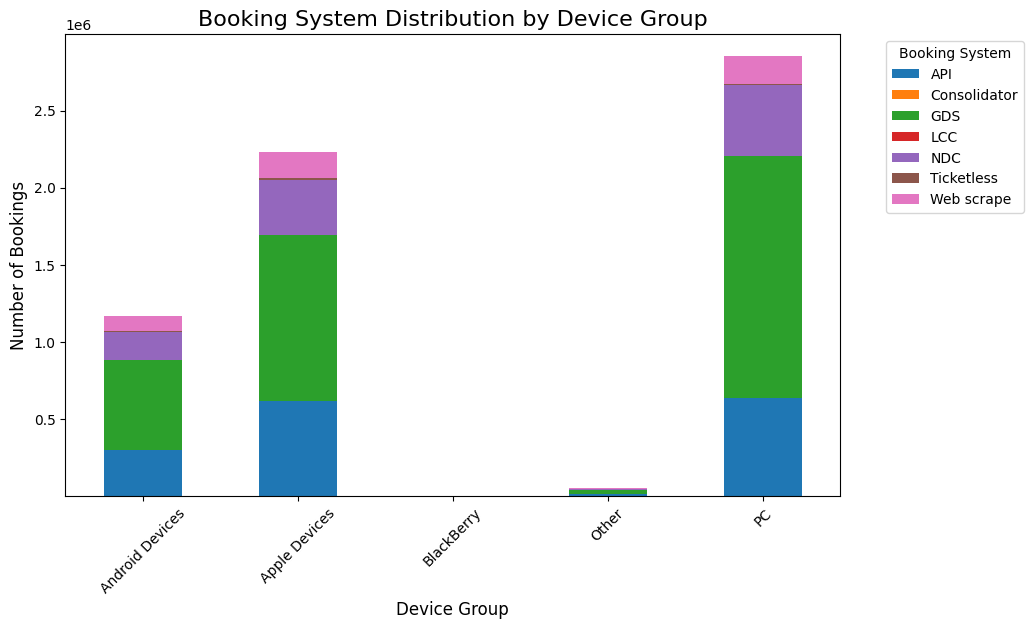

In [ ]:
booking_system_dist.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Booking System Distribution by Device Group', fontsize=16)
plt.xlabel('Device Group', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Booking System', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.show()